In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [ ]:
import gdown

In [ ]:
!gdown https://drive.google.com/uc?id=drive/folders/153Kf-gTC4BKveS1Va-bVzvQpSNeZvGjK

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=drive/folders/153Kf-gTC4BKveS1Va-bVzvQpSNeZvGjK 



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/MU Dataset/9-Box Scores.xlsx")
df2=pd.read_excel("/content/drive/MyDrive/MU Dataset/Attrition_Reason.xlsx")
df3=pd.read_excel("/content/drive/MyDrive/MU Dataset/Emp_Database.xlsx")
df4=pd.read_excel("/content/drive/MyDrive/MU Dataset/Management Meet Responses.xlsx")
df5=pd.read_excel("/content/drive/MyDrive/MU Dataset/Meet Category.xlsx")
df_hr=pd.read_excel("/content/drive/MyDrive/MU Dataset/HR MIS/HR Department.xlsx")
df_sales=pd.read_excel("/content/drive/MyDrive/MU Dataset/HR MIS/Sales Department.xlsx")
df_rd=pd.read_excel("/content/drive/MyDrive/MU Dataset/HR MIS/RandD Department.xlsx")

In [ ]:
df1.to_csv()
df2.to_csv()
df3.to_csv()
df4.to_csv()
df5.to_csv()
df_hr.to_csv()
df_sales.to_csv()
df_rd.to_csv()

',Emp Code,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,DoJ,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CTC\n0,2,49,No,Travel_Frequently,Research & Development,8,Life Sciences,1,3,Male,Research Scientist,2,Married,1,23,4,4,10,3,3,2012-09-07,7,1,7,128250\n1,3,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,Male,Laboratory Technician,3,Single,6,15,3,2,7,3,3,2022-06-06,0,0,0,52250\n2,4,33,No,Travel_Frequently,Research & Development,3,Life Sciences,1,4,Female,Research Scientist,3,Married,1,11,3,3,8,3,3,2014-07-21,7,3,0,72725\n3,5,27,No,Travel_Rarely,Research & Development,2,Medical,1,1,Male,Laboratory Technician,2,Married,9,12,3,4,6,3,3,2020-09-13,2,2,2,86700\n4,6,32,No,Travel_Frequently,Research & Development,2,Life Sci

# **Data Pre-Processing**

In [ ]:
df2=df2.drop('Attrition',axis=1)

Merging all department into one dataframe

In [ ]:
df_dept=pd.concat([df_hr,df_sales,df_rd])

In [ ]:
df_dept=df_dept.drop('EmployeeCount',axis=1)

In [ ]:
df_dept=df_dept.merge(df3,on="Emp Code",how='left')

In [ ]:
df_dept=df_dept.merge(df1,on="Emp Code",how='left')

In [ ]:
df_dept=df_dept.merge(df2,on="Emp Code",how='left')

In [ ]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Emp Code                  1470 non-null   int64         
 1   Age                       1470 non-null   int64         
 2   Attrition                 1470 non-null   object        
 3   BusinessTravel            1470 non-null   object        
 4   Department                1470 non-null   object        
 5   DistanceFromHome          1470 non-null   int64         
 6   EducationField            1470 non-null   object        
 7   EnvironmentSatisfaction   1470 non-null   int64         
 8   Gender                    1470 non-null   object        
 9   JobRole                   1470 non-null   object        
 10  JobSatisfaction           1470 non-null   int64         
 11  MaritalStatus             1470 non-null   object        
 12  NumCompaniesWorked  

In [ ]:
df_dept

,Emp Code,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,CTC,First Name,Last Name,PERFORMANCE,POTENTIAL,COMPA RATIO,Attrition Reason,Regrettable
0,80,46,No,Travel_Rarely,Human Resources,5,Medical,2,Male,Human Resources,...,0,2,125525,Dave,Brooks,NaN,NaN,NaN,NaN,NaN
1,101,37,Yes,Travel_Rarely,Human Resources,6,Human Resources,3,Male,Human Resources,...,0,2,51825,Lisa,Hazard,NaN,NaN,NaN,Employee Initiated,Yes
2,106,59,No,Non-Travel,Human Resources,2,Human Resources,3,Female,Manager,...,2,2,471100,Dario,Medina,NaN,NaN,NaN,NaN,NaN
3,113,54,No,Non-Travel,Human Resources,26,Human Resources,4,Female,Manager,...,4,4,433200,Alan,Dominguez,NaN,NaN,NaN,NaN,NaN
4,135,26,No,Travel_Rarely,Human Resources,25,Life Sciences,3,Female,Human Resources,...,5,7,73550,Daniel,Raglin,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1464,31,No,Non-Travel,Research & Development,5,Medical,2,Male,Manufacturing Director,...,1,7,248400,Sudipta,Chakraborty,NaN,NaN,NaN,NaN,NaN
1466,1466,36,No,Travel_Frequently,Research & Development,23,Medical,3,Male,Laboratory Technician,...,0,3,64275,Shijo,Thomas,NaN,NaN,NaN,NaN,NaN
1467,1467,39,No,Travel_Rarely,Research & Development,6,Medical,4,Male,Healthcare Representative,...,1,7,249775,Subhendu,Das,NaN,NaN,NaN,NaN,NaN
1468,1468,27,No,Travel_Rarely,Research & Development,4,Life Sciences,2,Male,Manufacturing Director,...,0,3,153550,Sagar,Patil,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dept.isnull().sum()

Emp Code                       0
Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
EducationField                 0
EnvironmentSatisfaction        0
Gender                         0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
NumCompaniesWorked             0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
DoJ                            0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
CTC                            0
First Name                     0
Last Name                      0
PERFORMANCE                 1426
POTENTIAL                   1426
COMPA RATIO                 1426
Attrition Reason            1233
Regrettabl

# **Gneral Info about Employees** (EDA)

In [ ]:
import seaborn as sns

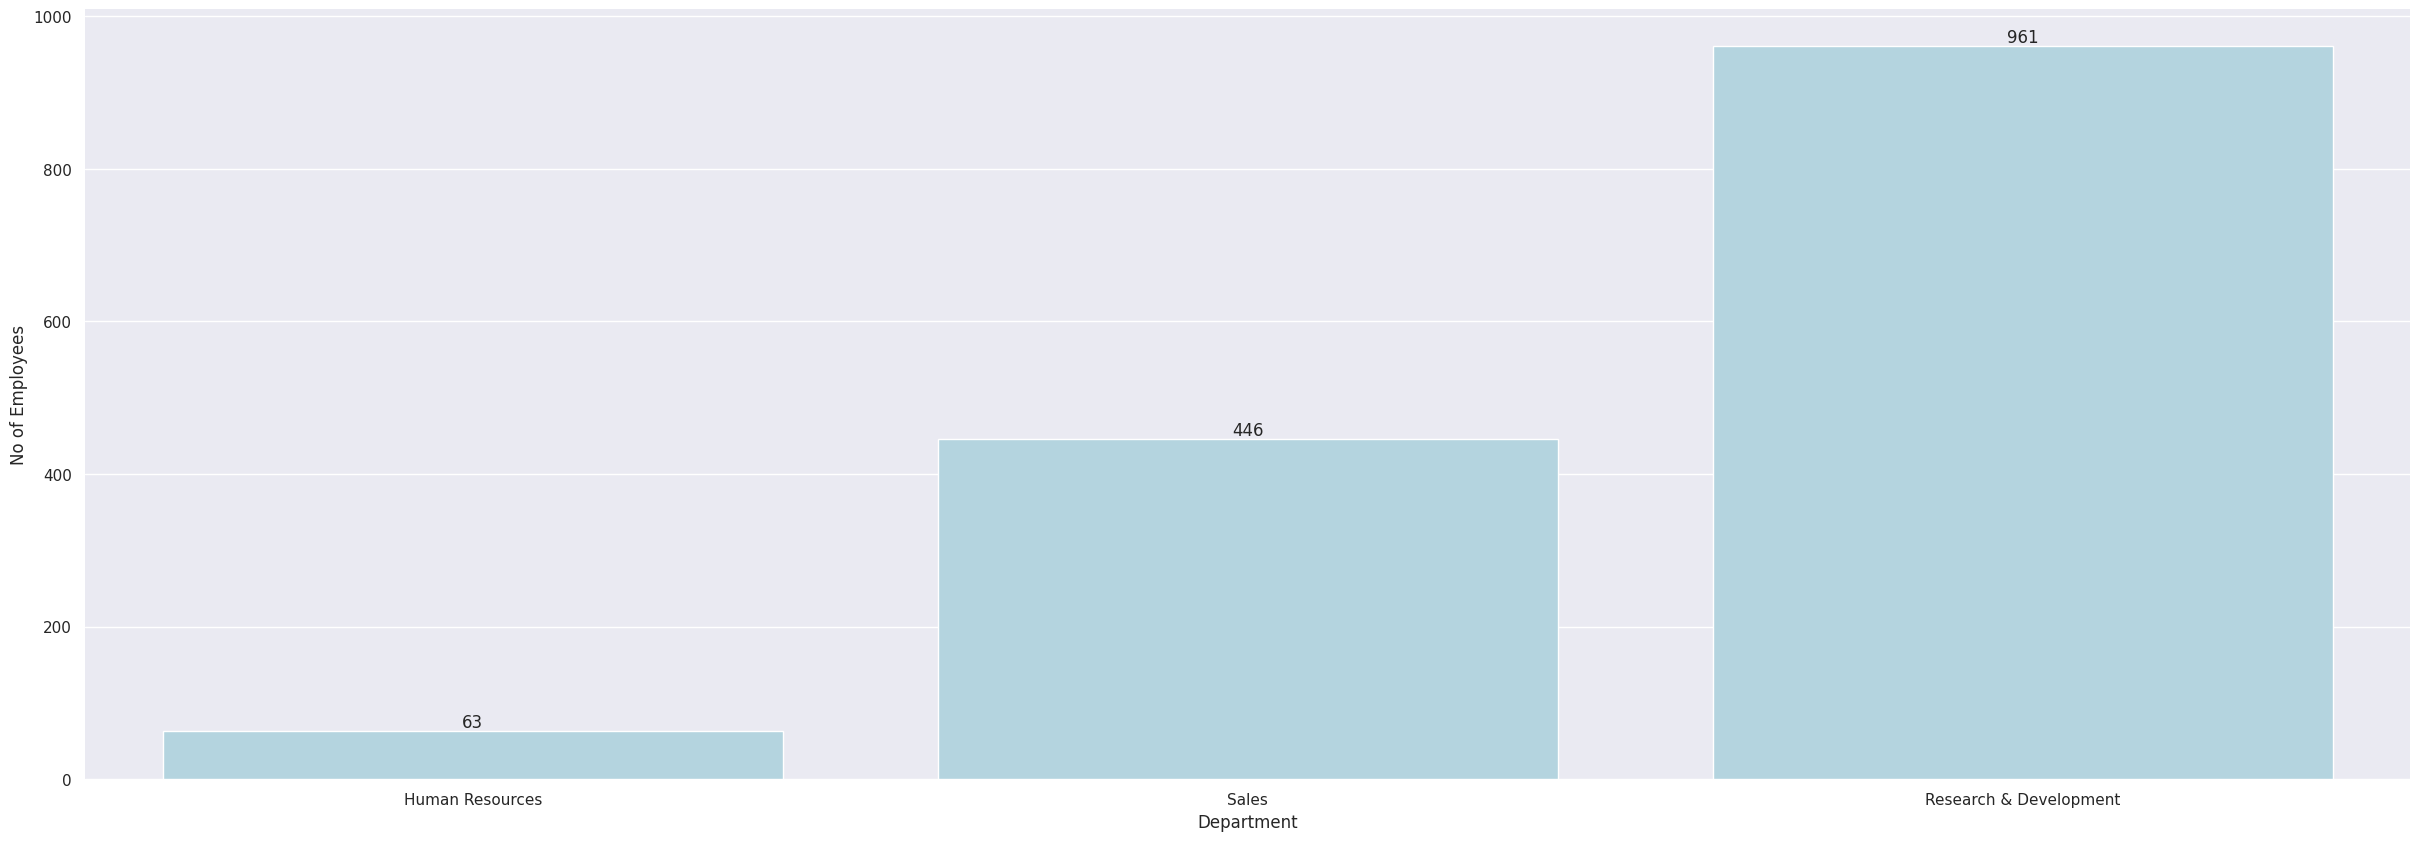

In [ ]:
ax=sns.countplot(x="Department",y=None,data=df_dept,color="lightblue")
sns.set(rc={'figure.figsize':(6,5)})
ax.set(ylabel="No of Employees")
sns.set_style('white')
sns.despine(bottom=True,left=True)
for labels in ax.containers:
  ax.bar_label(labels)


<Axes: title={'center': 'Workforce Composition by departments'}>

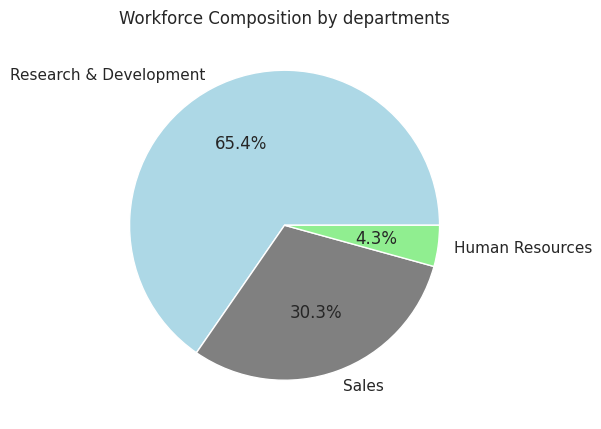

In [ ]:
df_dept['Department'].value_counts().plot(kind="pie",colors=["lightblue","grey","lightgreen"],figsize=(5,6),ylabel="",autopct='%1.1f%%',title="Workforce Composition by departments")

In [ ]:
df0=pd.DataFrame()
df0['DistanceCat']=pd.cut(df_dept['DistanceFromHome'],bins=[0,5,10,15,30],labels=['Near (0-5)','Mid-Distance(5-10)','Far(10-15)','Very Far(15-30)']).value_counts()


In [ ]:
#sns.barplot(df0,x=df0.index,y=df0.values)

<Axes: title={'center': 'Workforce Gender composition'}>

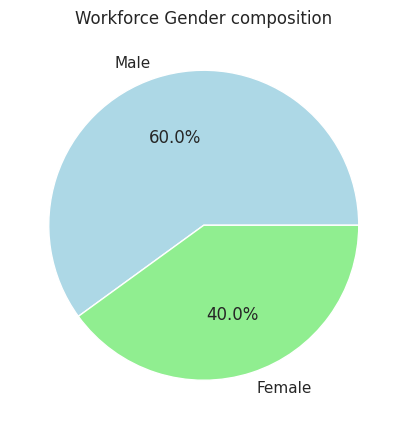

In [ ]:
df_dept['Gender'].value_counts().plot(kind="pie",figsize=(5,6),title="Workforce Gender composition",colors=['lightblue','lightgreen'],autopct='%1.1f%%',ylabel="")

In [ ]:
df_dept['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

**Department-wise Attrition of employees in %age**

In [ ]:
df_att=df_dept.loc[(df_dept['Attrition']=='Yes','Department')].value_counts()

In [ ]:
df_att

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [ ]:
df_att.values[0]

133

In [ ]:
df_dept.loc[(df_att.index[0]==df_dept['Department']),'Department'].value_counts()

Research & Development    961
Name: Department, dtype: int64

In [ ]:
pct=[]
for i in range(0,3):
  pct.append(df_att.values[i]/(df_dept.loc[(df_att.index[i]==df_dept['Department']),'Department'].value_counts())*100)

In [ ]:
pc=[]
for i in range(len(pct)):
  pc.append(pct[i][0])

[Text(0.5, 1.0, 'Department-wise % Attrition')]

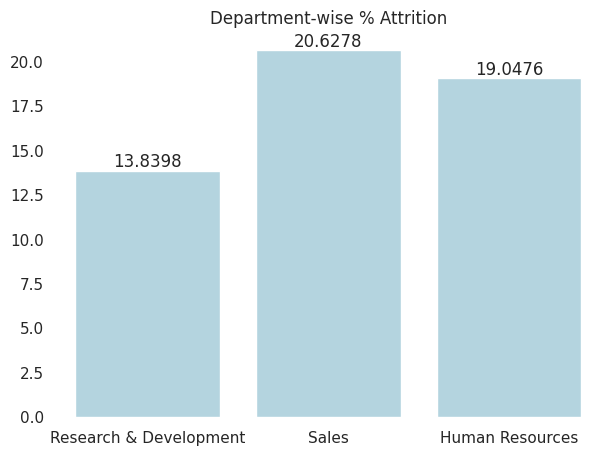

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax=sns.barplot(x=df_att.index,y=pc,color="lightblue")
for labels in ax.containers:
  ax.bar_label(labels)
sns.despine(bottom=True,left=True)
ax.set(title="Department-wise % Attrition")




---


---


**Sales Department has most of the employees wanting to Leave the company 20.6% followed by HR 19% and R&d with 13.8%**

---



---



<ipython-input-188-ee96d179b35b>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




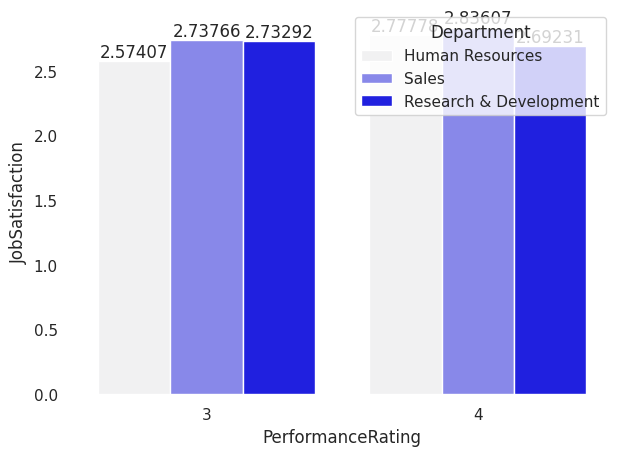

In [ ]:
ax=sns.barplot(df_dept,x="PerformanceRating",y="JobSatisfaction",hue="Department",color="blue",ci=None)
sns.despine(bottom=True,left=True)
for label in ax.containers:
  ax.bar_label(label)

In [ ]:
df=df_dept.loc[(df_dept['PerformanceRating']==4)& (df_dept['JobSatisfaction']<=2)&(df_dept['Attrition']=='Yes'),:]

<ipython-input-190-00b90aaf9b12>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='YearsSinceLastPromotion', ylabel='PercentSalaryHike'>

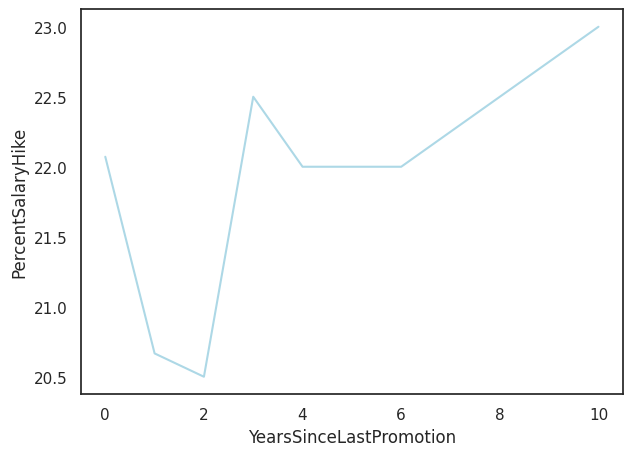

In [ ]:
#sns.rc=
sns.lineplot(df,x="YearsSinceLastPromotion",y="PercentSalaryHike",color="lightblue",ci=None)

In [ ]:
df1=df.groupby('YearsInCurrentRole')

In [ ]:
#sns.barplot(df,x=[min(df['YearsSinceLastPromotion']):max(df['YearsSinceLastPromotion'])],y=df['YearsSinceLastPromotion']==x)

Why Sales department has most Attrition is it Compa Ratio less?

<ipython-input-193-60237a6e5ee4>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




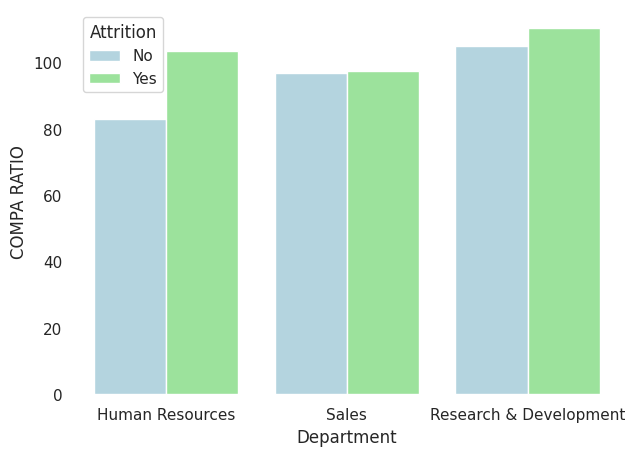

In [ ]:
df1=df_dept.loc[df_dept['COMPA RATIO']!='NaN',['COMPA RATIO','Emp Code','Department','Attrition']]
sns.set_style("white")
palette=['lightblue','lightgreen']
sns.barplot(df1,x='Department',y='COMPA RATIO',hue='Attrition',ci=None,palette=palette)
sns.despine(bottom=True,left=True)



---



---


The above plot shows that Sales deparment and HR employees are paid less than their peers in the market,while R&D employees are paid competitive salary.


---



---



In [ ]:
df_att_gender=df_dept.loc[(df_dept['Attrition']=='Yes',['Department','Gender'])].value_counts()

In [ ]:
df_att_gender

Department              Gender
Research & Development  Male      90
Sales                   Male      54
Research & Development  Female    43
Sales                   Female    38
Human Resources         Female     6
                        Male       6
dtype: int64

[Text(0.5, 1.0, 'Gender Wise % Attrition in each Department')]

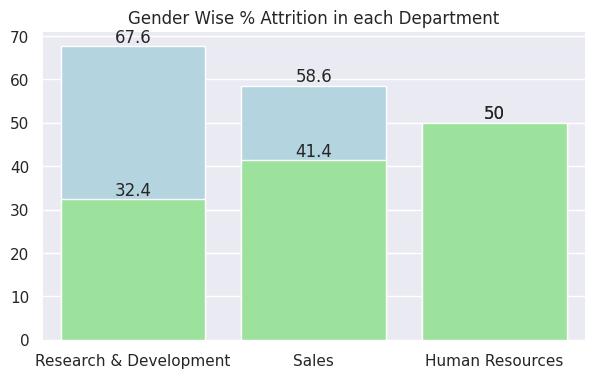

In [ ]:
pctmale=[67.6,58.6,50.0]
pctfemale=[32.4,41.4,50.0]
sns.set(rc={'figure.figsize':(7,4)})
ax=sns.barplot(x=df_att.index,y=pctmale,color="lightblue")
bx=sns.barplot(x=df_att.index,y=pctfemale,color="lightgreen")
for labels in ax.containers:
  ax.bar_label(labels)
sns.despine(bottom=True,left=True)
#plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',labels=['Male'])
ax.set(title="Gender Wise % Attrition in each Department")





---



---
Among all the leaving employees :


*   HR department has 50% each of male and female employees
*   Sales has 41.4% female and 58.6% male
*   R&D has 32.4% female and 67.6% male



---



---









What could be the Attrition Reason?

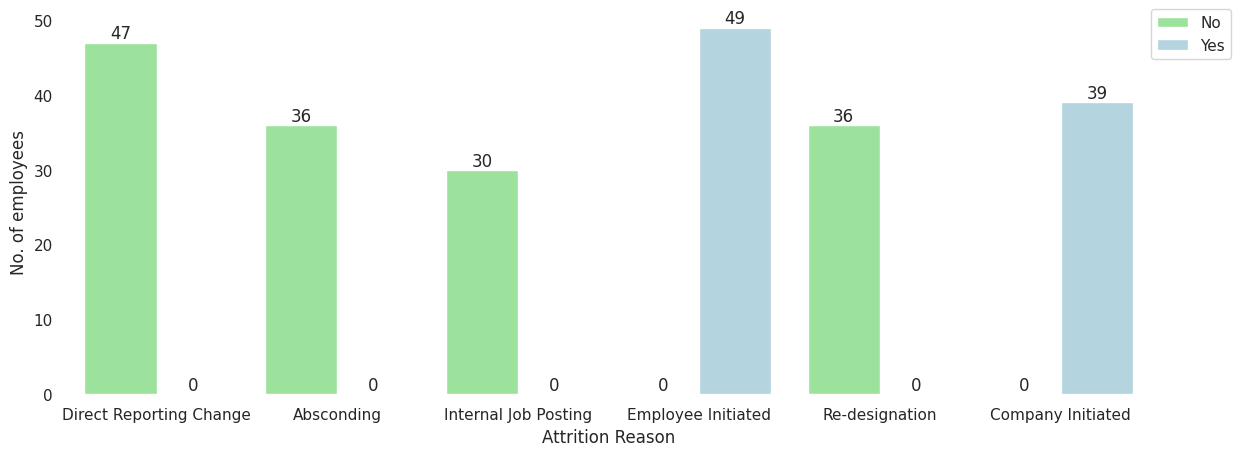

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style("white")
import matplotlib.pyplot as plt
ax=sns.countplot(x="Attrition Reason",hue="Regrettable",data=df2,palette="blend:lightgreen,lightblue")
plt.legend(bbox_to_anchor=(1,1),loc='upper left',borderaxespad=0)
sns.despine(bottom=True,left=True)
ax.set(ylabel="No. of employees")
for label in ax.containers:
  ax.bar_label(label)



---



---

Employees with Direct Reporting Change, Absconding and Internal Job Posting don't have regrets of leaving the company
while
Employees leaving company due to


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

Impact of Attrition on Distance From Home

In [ ]:
df_dept2=df_dept.groupby(['DistanceFromHome','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name="No of Employees")
dist_att=df_dept2.loc[df_dept2['Attrition']=='Yes',['No of Employees','DistanceFromHome','Attrition']]
ax=px.line(dist_att,x="DistanceFromHome",y="No of Employees",title="Distance of Office impact on Attrition")
ax.update_yaxes(showgrid=False)
ax.update_xaxes(showgrid=False)

In [ ]:
df_dept2=df_dept.groupby(['DistanceFromHome','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name="No of Employees")
ax=px.line(df_dept2,x="DistanceFromHome",y="No of Employees",title="Distance of Office impact on Attrition",color="Attrition")
ax.update_yaxes(showgrid=False)
ax.update_xaxes(showgrid=False)



---



---
As distance of home from office increases, the percent of employees wanting to leave the company increases, both lineplot coming closer indicates the distance from home causes employees to consider attrition (employee/employer initiatied)


---



---




How does distance from home impact the Performace,Job Satisfaction of employees?

<ipython-input-202-4b914098fae0>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




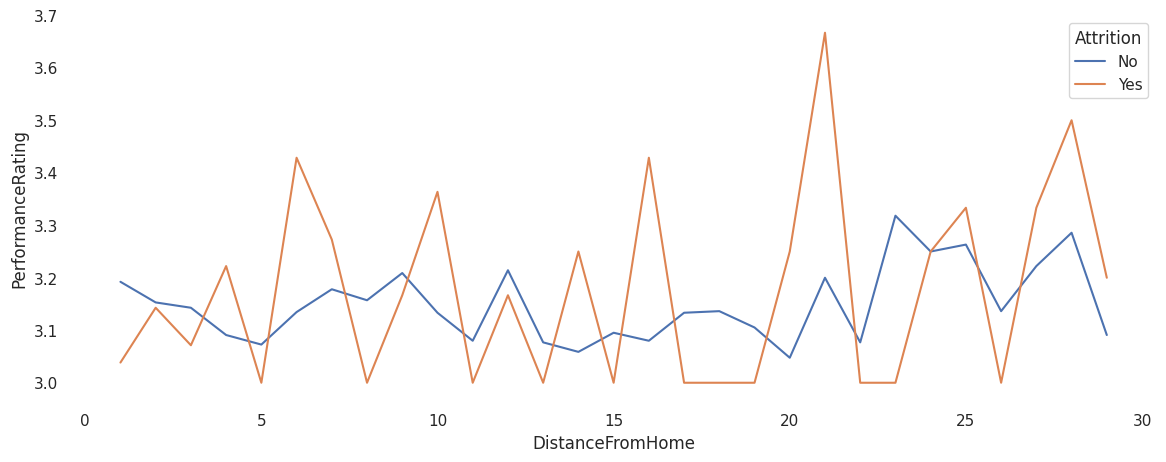

In [ ]:
sns.lineplot(df_dept,x='DistanceFromHome',y='PerformanceRating',hue='Attrition',ci=None)
sns.despine(bottom=True,left=True)

In [ ]:
df_dept['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [ ]:
df_dept['PerformanceRating']

0       4
1       4
2       4
3       3
4       4
       ..
1465    3
1466    3
1467    3
1468    4
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

# **REVIEW**

In [ ]:
#ax=sns.barplot(df0,x=df0.index,y=df0['DistanceCat'],color="lightblue",hue=df0["Performance"])
#sns.set_style("white")
#sns.despine(bottom=True,left=True)
#ax.set(ylabel="No of Employees")
#for label in ax.containers:
 # ax.bar_label(label)


<ipython-input-206-45a3b935cebe>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




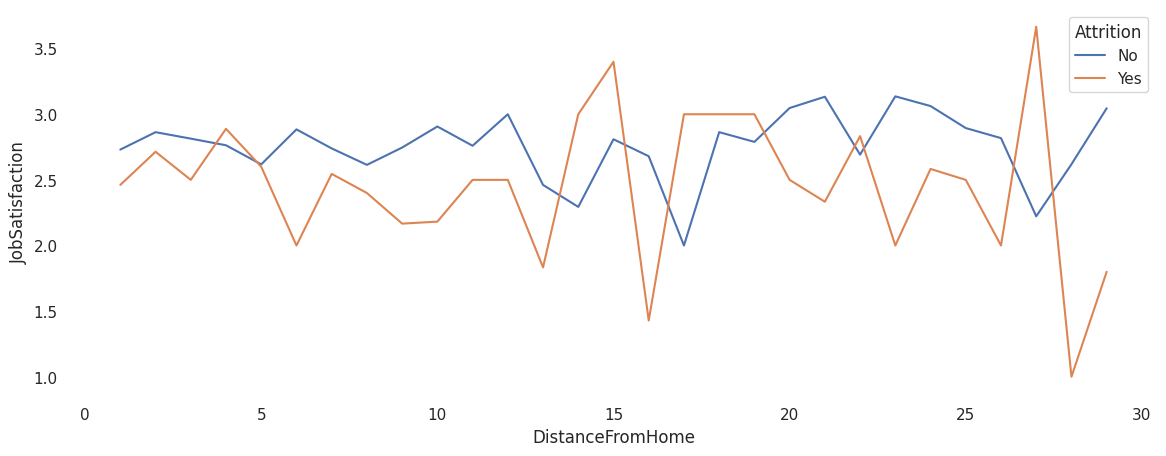

In [ ]:
sns.lineplot(df_dept,x='DistanceFromHome',y='JobSatisfaction',hue='Attrition',ci=None)
sns.despine(bottom=True,left=True)

<ipython-input-207-b04c73477787>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




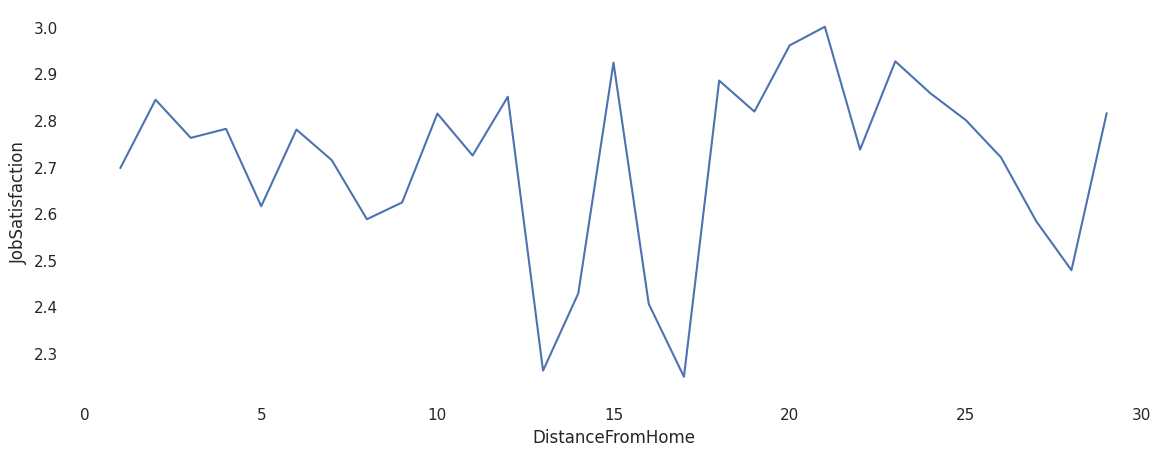

In [ ]:
sns.lineplot(df_dept,x='DistanceFromHome',y='JobSatisfaction',ci=None)
sns.despine(bottom=True,left=True)



---



---

The above plots show that employees with greater distance from home have lesser job ssatisfaction and performance rating, such employees attrition can be predicted

---



---



Impact of Age on Attrition of employee?

In [ ]:
#age_att=df_dept.groupby(['Age','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
#ax=px.line(age_att,x='Age',y='No of Employees',color='Attrition',title='Impact of Age of employee on Attrition',height=00,width=1000)
#ax.update_xaxes(showgrid=False)
#ax.update_yaxes(showgrid=False)

**Impact of Age on attrition**

In [ ]:
ax=px.histogram(df_dept,x='Age',color='Attrition')
ax.update_layout(yaxis_title='No of Employees')

In [ ]:
df_dept1=df_dept.groupby(['Age','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
age_att=df_dept1.loc[df_dept1['Attrition']=='Yes',['Age','No of Employees','Attrition']]
ax=px.line(age_att,x='Age',y='No of Employees')
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)



---



---

Employees of Age group 28-33 are more prone to Attrition (Yes)


---



---



Age and Years in current role relation

<ipython-input-211-43e83a5bac3a>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='Age', ylabel='YearsInCurrentRole'>

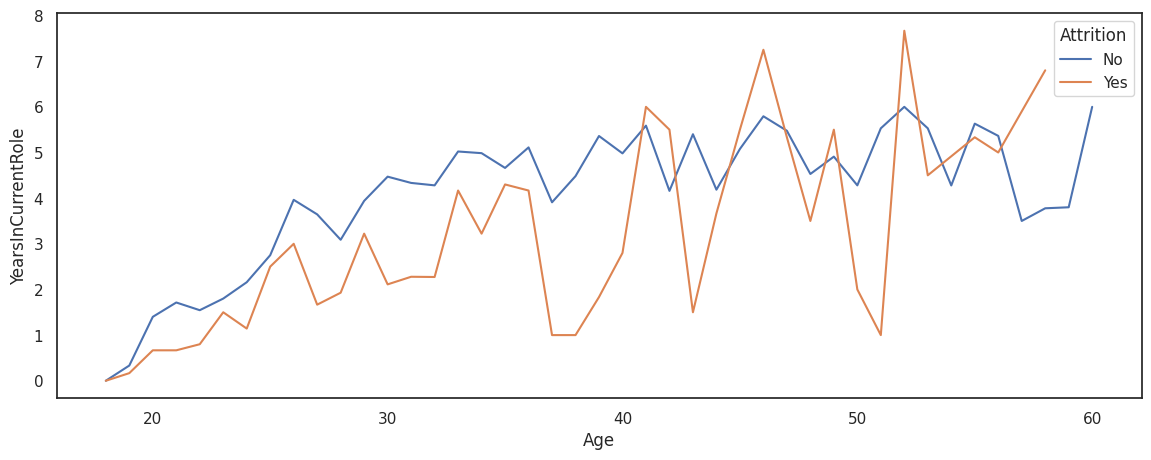

In [ ]:
sns.lineplot(df_dept,x="Age",y="YearsInCurrentRole",hue="Attrition",color="blue",ci=None)



---



---


This shows that employees between 28-33yrs that are more prone to leave the company only have worked for 2-3 yrs in the company

Strategies to increases retention during these years such as keeping the manager same over years


---



---



<ipython-input-212-6d7530de4e72>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




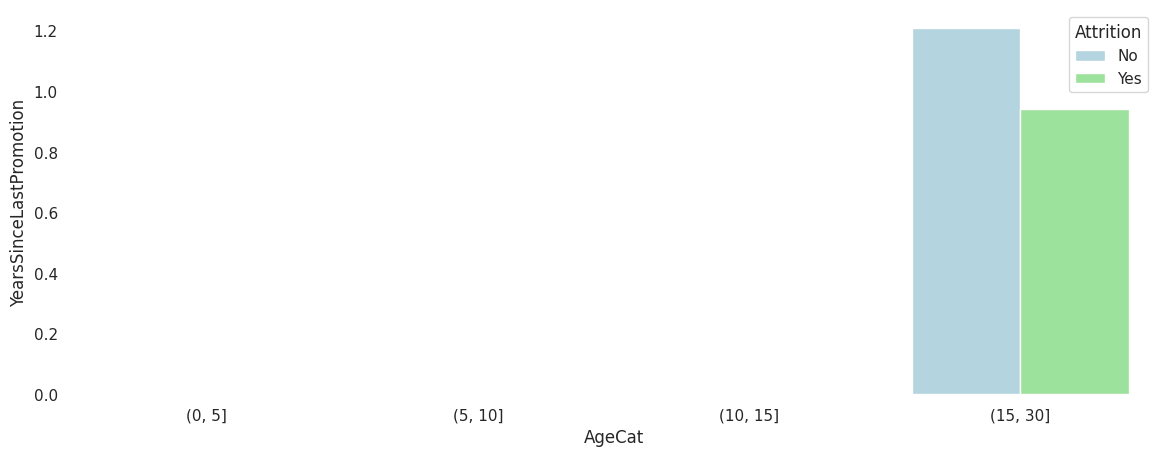

In [ ]:
palette=['lightblue','lightgreen']
df_dept['AgeCat']=pd.cut(df_dept['Age'],bins=[0,5,10,15,30])
sns.barplot(df_dept,x="AgeCat",y="YearsSinceLastPromotion",hue="Attrition",ci=None,palette=palette)
sns.despine(bottom=True,left=True)



---



---
Newer employees need faster promotions to keep them satisfied to work, 28-33 age group has avg 1-2 years since their last promotion, so proxy promotion to give them sense of achievment might be able to increase the retention at this fragile employee age group


---



---



In [ ]:
df_dept['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

Impact of Income on Attrition of employees

In [ ]:
df3=df_dept.groupby(['CTC','Attrition','PerformanceRating','TotalWorkingYears']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
inc_att=df3.loc[(df3['Attrition']=='Yes') & (df3['TotalWorkingYears']>5) &(df3['PerformanceRating']==4),['CTC','No of Employees','Attrition','PerformanceRating']]
ax=px.histogram(inc_att,x='CTC',y='No of Employees',title='Impact of Salary of employee on Attrition',color='PerformanceRating',height=500,width=1000)
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)
ax.update_layout(bargap=0.3)
ax.update_layout(yaxis_title="No of Employees")

In [ ]:
df3=df_dept.groupby(['CTC','Attrition','PerformanceRating','TotalWorkingYears']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
inc_att=df3.loc[ (df3['TotalWorkingYears']>5) &(df3['PerformanceRating']==4),['CTC','No of Employees','Attrition','PerformanceRating']]
ax=px.histogram(inc_att,x='CTC',y='No of Employees',title='Impact of Salary of employee on Attrition',color='PerformanceRating',height=500,width=1000)
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)
ax.update_layout(bargap=0.3)
ax.update_layout(yaxis_title="No of Employees")

In [ ]:
df3=df_dept.groupby(['CTC','Attrition','PerformanceRating','TotalWorkingYears','JobSatisfaction']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
inc_att=df3.loc[ (df3['TotalWorkingYears']>5) &(df3['PerformanceRating']==4) &(df3['JobSatisfaction']<=2),['CTC','No of Employees','Attrition','PerformanceRating']]
ax=px.histogram(inc_att,x='CTC',y='No of Employees',title='Impact of Salary of employee on Attrition',color='PerformanceRating',height=500,width=1000)
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)
ax.update_layout(bargap=0.3)
ax.update_layout(yaxis_title="No of Employees")

In [ ]:
df_dept['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [ ]:
df3=df_dept.groupby(['CTC','Attrition','PerformanceRating','TotalWorkingYears','JobSatisfaction','PercentSalaryHike']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
inc_att=df3.loc[ (df3['TotalWorkingYears']>5) &(df3['PerformanceRating']==4) &(df3['JobSatisfaction']<=2)&(df3['Attrition']=='Yes'),['CTC','No of Employees','Attrition','PerformanceRating','PercentSalaryHike']]
ax=px.histogram(inc_att,x='CTC',y='No of Employees',title='Impact of Salary of employee on Attrition',color='PercentSalaryHike',height=500,width=1000)
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)
ax.update_layout(bargap=0.3)
ax.update_layout(yaxis_title="No of Employees")

In [ ]:
ax.show()



---



---
Inference: Employees with lower CTC salary of range 50k to 100k are most likely to leave the company


---




---



Impact of working under the same manager on tendancy to leave the company

In [ ]:
df3=df_dept.loc[df_dept['Attrition']=='Yes',['YearsWithCurrManager']]
ax=px.histogram(df3,x='YearsWithCurrManager')
ax.update_layout(bargap=0.3)
ax.update_layout(yaxis_title="No of Employees")
ax.show()




---


---
Employees tend to stay with the company as years under a manager increases. Employees with 0-2 years with a manager have more attrition than other employees


---



---




In [ ]:
df4=df_dept.groupby(['WorkLifeBalance','YearsWithCurrManager','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
worklife_yrswithmanager=df4.loc[df4['Attrition']=='Yes',['WorkLifeBalance','No of Employees','YearsWithCurrManager']]
ax=px.line(worklife_yrswithmanager,x='YearsWithCurrManager',y="No of Employees",color='WorkLifeBalance')
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)

Work Life Balance as stated by employees, decreases with working under a manager for long time.

**Impact of Job Satisfaction on Attrition**

First, we will compare job satisfaction of Employees with Attrition tendancy to employees with no attrition

<ipython-input-222-af6f85d0bea3>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




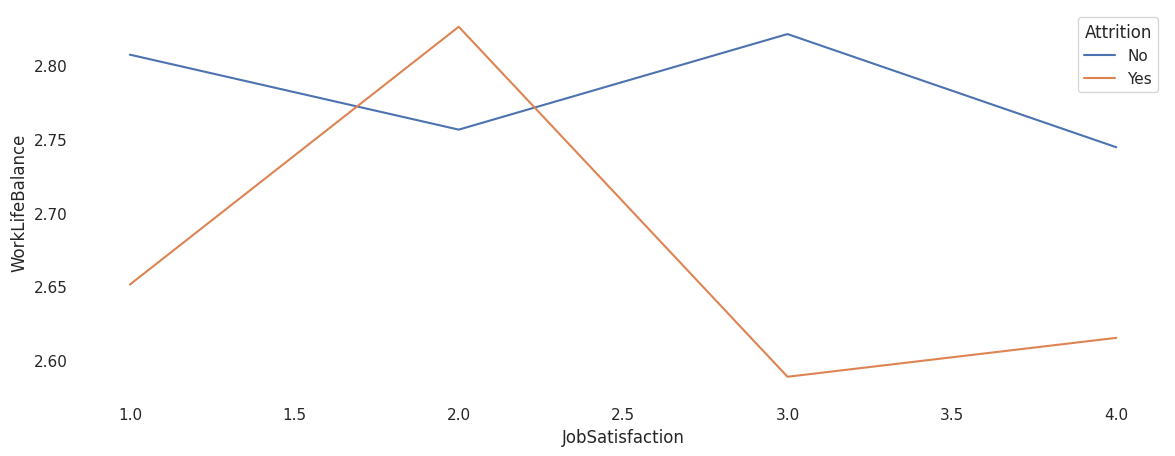

In [ ]:
sns.lineplot(df_dept,x='JobSatisfaction',y='WorkLifeBalance',hue='Attrition',ci=None)
sns.despine(bottom=True,left=True)



---


---





This shows that employees prone to attrition have less Work life balance and Job satusfaction than those who choose to stay at the company.


---


---





In [ ]:
df4=df_dept.groupby(['JobSatisfaction','WorkLifeBalance','Attrition']).apply(lambda x:x['Emp Code'].count()).reset_index(name='No of Employees')
job_att=df4.loc[df4['Attrition']=='Yes',['WorkLifeBalance','No of Employees','JobSatisfaction']]
ax=px.histogram(job_att,x='JobSatisfaction',y="No of Employees",color='WorkLifeBalance')
ax.update_layout(bargap=0.2)
ax.update_xaxes(showgrid=False)
ax.update_yaxes(showgrid=False)
ax.update_layout(yaxis_title="No of Employees")



---



---
Work Life Balance and Job Satisfactin show that employees with higher job satisfaction will have greater worklife balance and less tendancy to leave the company

(3-3) is the most common score of JobSatisfaction and WorkLifeBalance

---



---



**Impact of business travel on tendancy to leave in different departments**

In [ ]:
df_dept.groupby('EducationField').mean()

<ipython-input-224-e85e6794f35d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Emp Code,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CTC,PERFORMANCE,POTENTIAL,COMPA RATIO
EducationField,,,,,,,,,,,,,,,,,,,
Human Resources,845.629630,37.037037,9.037037,2.666667,2.555556,3.259259,14.777778,3.111111,3.037037,11.592593,2.444444,2.740741,3.555556,1.629630,3.370370,181028.703704,4.000000,3.000000,104.000000
Life Sciences,735.041254,37.107261,8.955446,2.689769,2.797030,2.674917,15.254125,3.158416,2.686469,11.245875,2.739274,2.727723,4.308581,2.178218,4.138614,161582.219472,3.500000,3.000000,100.772727
Marketing,718.610063,37.924528,10.106918,2.723270,2.654088,2.559748,14.918239,3.132075,2.691824,11.855346,2.691824,2.798742,4.490566,2.245283,4.465409,183714.622642,2.800000,2.400000,89.400000
Medical,729.922414,36.838362,9.353448,2.687500,2.691810,2.784483,15.366379,3.161638,2.760776,11.564655,2.933190,2.762931,4.088362,2.295259,4.062500,162750.915948,3.500000,3.000000,107.600000
Other,754.000000,35.365854,8.926829,3.012195,2.743902,2.560976,15.500000,3.170732,2.621951,10.353659,2.756098,2.853659,3.975610,1.658537,3.951220,151788.719512,3.000000,3.000000,111.000000
Technical Degree,743.537879,36.121212,8.810606,2.818182,2.659091,2.583333,14.712121,3.128788,2.674242,10.250000,2.833333,2.810606,4.340909,2.227273,4.113636,143957.575758,3.333333,3.666667,109.333333


[Text(0, 0.5, 'No of Employees')]

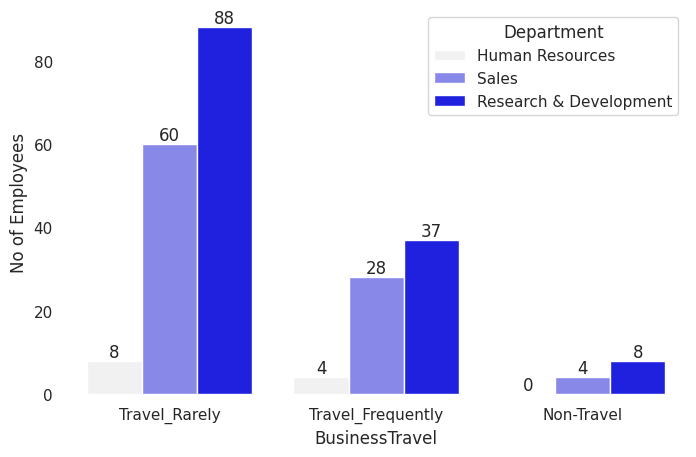

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax=sns.countplot(df_dept.loc[df_dept['Attrition']=='Yes',['BusinessTravel','Department']],x='BusinessTravel',hue='Department',color='blue')
for labels in ax.containers:
  ax.bar_label(labels)
sns.despine(bottom=True,left=True)
ax.set(ylabel='No of Employees')


[Text(0, 0.5, 'No of Employees')]

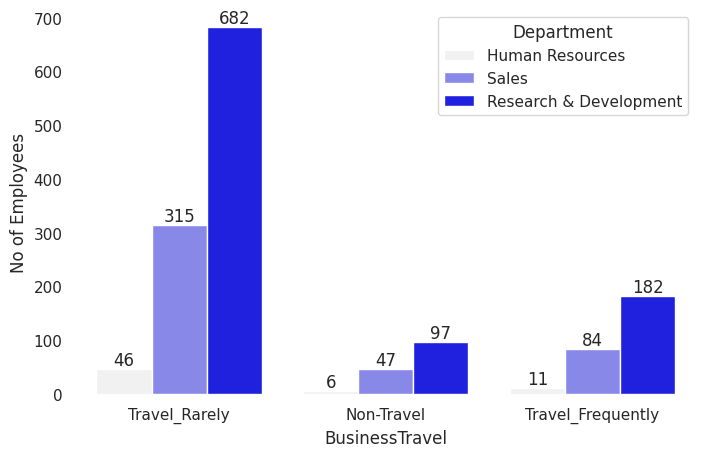

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax=sns.countplot(df_dept,x='BusinessTravel',hue='Department',color='blue')
for labels in ax.containers:
  ax.bar_label(labels)
sns.despine(bottom=True,left=True)
ax.set(ylabel='No of Employees')



---

---
This plot shows that out of 237 attriton prone employees a huge number of 156 travel rarely out of which Sales department and R&D travel least for company related works.

Sales department,more travel incentives must be given to employees for better job satisfaction


---



---






**How does travel impact jobsatisfaction?**

<ipython-input-227-9cf982afed7a>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




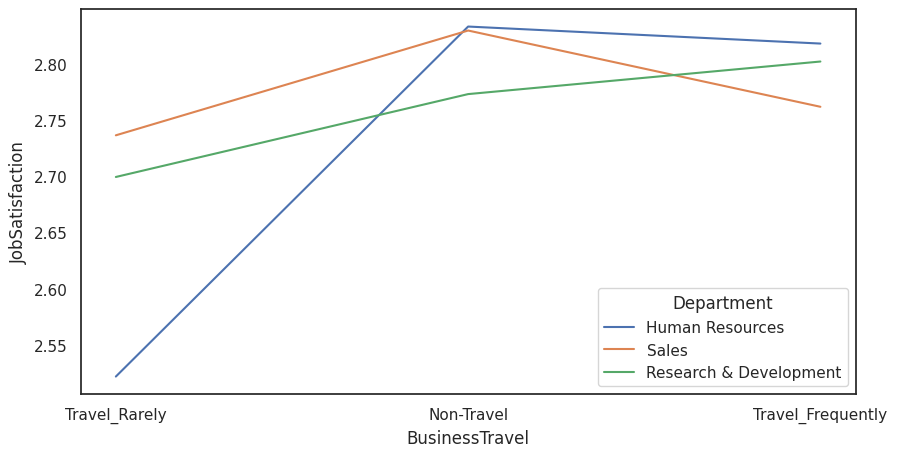

In [ ]:
#plt.legend(bbox_to_anchor=(1.5,2),loc='upper left',borderaxespad=0)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
sns.despine(bottom=True,left=True)
ax=sns.lineplot(df_dept,x='BusinessTravel',y='JobSatisfaction',hue='Department',ci=None)




---



---


The plot shows that HR department employees have less Job Satisfaction when they travel rarely for company related works.


---



---



# **Now that we have identified the impact of various factors on Attrition, We will now move on to proposing solutions by considering more metrics of Performances**

Department wise performance of employees

In [ ]:
hr_3=0
hr_4=0
s_3=0
s_4=0
rd_3=0
rd_4=0
for i in range(len(df_dept)):
  if(df_dept['Department'].iloc[i]=='Human Resources'):
    if(df_dept['PerformanceRating'].iloc[i]==3):
      hr_3+=1
    else:
      hr_4+=1
  elif (df_dept['Department'].iloc[i]=='Sales'):
       if(df_dept['PerformanceRating'].iloc[i]==3):
         s_3+=1
       else:
         s_4+=1
  else:
       if(df_dept['PerformanceRating'].iloc[i]==3):
         rd_3+=1
       else:
         rd_4+=1



In [ ]:
df=pd.DataFrame(  list(zip([rd_3/(rd_3+rd_4)],[rd_4/(rd_3+rd_4)],[s_3/(s_3+s_4)],[s_4/(s_3+s_4)],[hr_3/(hr_3+hr_4)],[hr_4/(hr_3+hr_4)])),
                index=['R&D_3',"R&D_4",'Sales_3','Sales_4','HR_3','HR_4']
)

In [ ]:
df.values

array([[0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714],
       [0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714],
       [0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714],
       [0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714],
       [0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714],
       [0.83766909, 0.16233091, 0.8632287 , 0.1367713 , 0.85714286,
        0.14285714]])

[Text(0.5, 0, ' Performance Ratings of departments')]

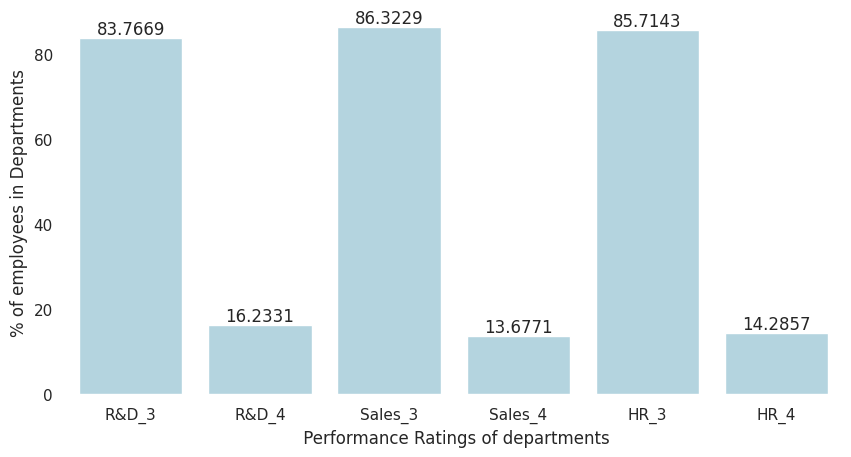

In [ ]:
ax=sns.barplot(df,x=df.index,y=df.values[0]*100,color='lightblue')
for label in ax.containers:
  ax.bar_label(label)
sns.despine(bottom=True,left=True)
ax.set(ylabel="% of employees in Departments")
ax.set(xlabel=" Performance Ratings of departments")



---



---

This shows that Sales department has least % of employees with a good Performance Ratings while R&D has 16% employees with a performance rating of 4.

---



---



**How does number of company worked before impact the performace of employee and attrition?**

[Text(0, 0.5, 'No of Employees')]

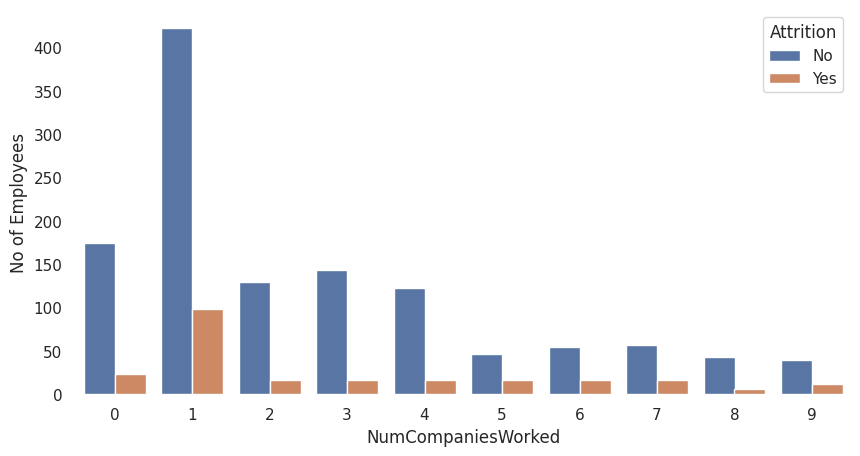

In [ ]:
ax=sns.countplot(df_dept,x='NumCompaniesWorked',hue='Attrition')
sns.despine(bottom=True,left=True)
ax.set(ylabel="No of Employees")



---



---
This plot shows that of all employees, those who have previosly worked only in 1 company before are more likely to leave th company than those with more work experience.

Suggesting hiring ways of setting experience bar will help company to improve retention rate and performance



---



---




<ipython-input-233-00f8402e0e4e>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='NumCompaniesWorked', ylabel='PerformanceRating'>

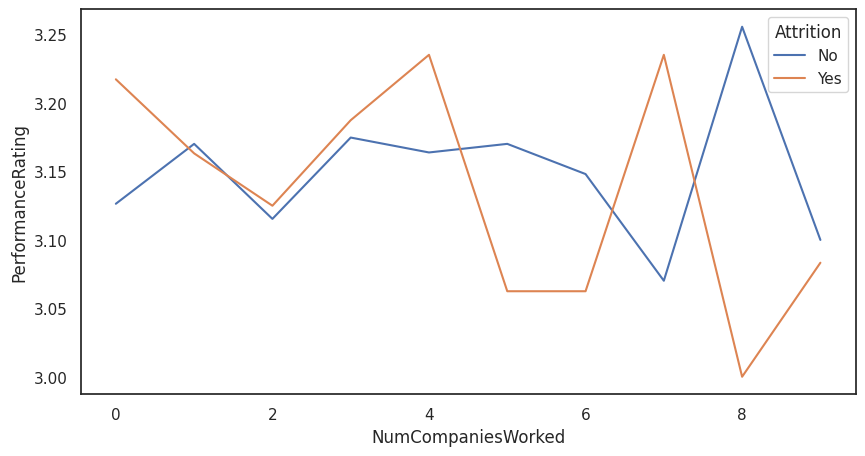

In [ ]:
sns.lineplot(df_dept,x='NumCompaniesWorked',y='PerformanceRating',hue='Attrition',ci=None)

Realtion between Attrition, Total working years and Percent Salary Hike

<ipython-input-234-8b68615d4312>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




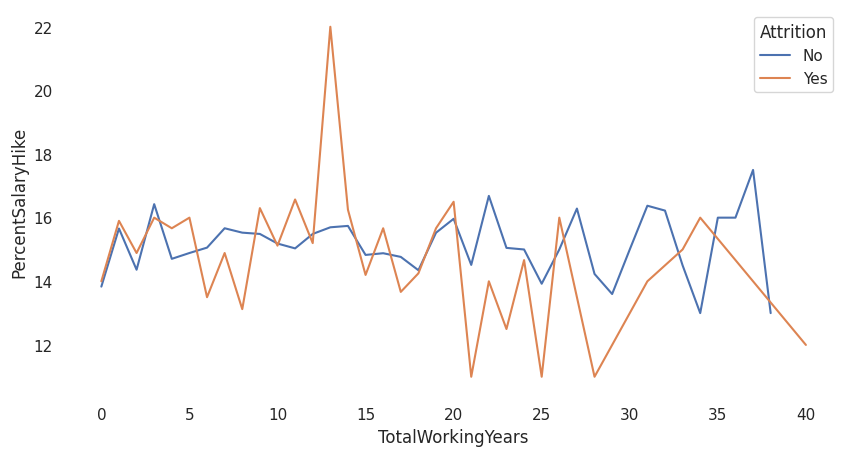

In [ ]:
sns.lineplot(df_dept,x='TotalWorkingYears',y="PercentSalaryHike",hue="Attrition",ci=None)
sns.despine(bottom=True,left=True)



---



---

Removing the outlier peak between 10-15yrs of working, other line plot suggests that Employees that leave the company inspite of their working experience have lesser percent salary hike compared to those who stay at the company.

---



---



# **DIFFERENT FACTORS IMPACT ON PERFORMACE**

In [ ]:
ax=px.histogram(df_dept,x="Department",color="PerformanceRating",y="TrainingTimesLastYear")
ax.update_layout(yaxis_title="Sum of Training Last Yr for each Department")



---



---

The above plot shows that despite intensive trainings of employees of different departments, the performace rating of 3 (low rate) is more than 4(good) that indicates an inefficient training method or evaluation metrics.



---



---



<ipython-input-236-7b7d82afd59f>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




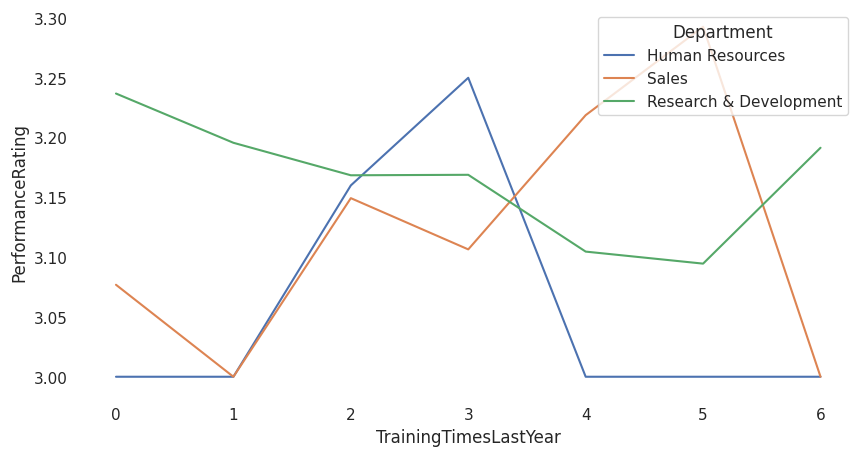

In [ ]:
sns.lineplot(df_dept,x="TrainingTimesLastYear",hue="Department",y="PerformanceRating",ci=None)
sns.despine(bottom=True,left=True)

EMPLOYEES MANAGEMENT MEET



---



---


HR-- Employees have low performance as training increases from 3 times to 6,too much training of HR employees reduces their performance rating
Sales--
R&D--The plot suggests that training of R&D department hasn't been beneficial to improve the performance of employees, the methods of training must be revised.



---



---



From the above insights, we conclude that Attrition is highly effected by:


*   Department of the Employee-- 20% Sales employee tend to leave while 19% from HR and least from R&D i.e. 13.8%, now focussing on why sales department has most Attrition?

*   Attrition where it is Employee/Company initiated is regretted by employees that might have been loyal to the company, thus preventive methods of identifying such attrition initiations to increases retention of quality employees
*   As distance of home from office increases, the percent of employees wanting to leave the company increases, both lineplot coming closer indicates the distance from home causes employees to consider attrition (employee/employer initiatied)


*   Job Satisfaction of Employees decrease with office's distance from home
*   Age Factor-- For the age group of 28-33, employees are most prone to leave the company than others due to lower Job Satisfaction and low working years at the company

*   Salary-- Employees with lower salary tend to leave the company,monetary benefits can help in retaining employees.
*   Years spent under a Manager-Among the Attrition prone employees,those who spend less number of years with a particular manager tend to leave the company earlier, this may be due to lack of sense of attachement to their work and Boss (feeling of burden)


*   Number of companies previously worked in -- all employees, those who have previosly worked only in 1 company before are more likely to leave th company than those with more work experience. Suggesting hiring ways of setting experience bar will help company to improve retention rate and performance

*   Work-Life balance & Job satisfaction-- Employees with less WLB & JS tend to leave the company early.Work Life Balance and Job Satisfactin show that employees with higher job satisfaction will have greater worklife balance and less tendancy to leave the company
*   Travel-- Out of 237 attriton prone employees a huge number of 156 travel rarely out of which Sales department and R&D travel least for company related works. Sales department,more travel incentives must be given to employees for better job satisfaction. HR department employees have less Job Satisfaction when they travel rarely for company related works.

*    Sales department has least percent 13% of employees with a good performace while 16% employees of HR have good performace(4)


*   Percent Salary Hike-- Employees with ggod working experience must be compensated with decent salary hike and Compa Ratio to improve retention
                     
                           PERFORMACE

The performace and efficiency of employees is impacted by:

*   Training hours in each department:

   HR-- Employees have low performance as training increases from 3 times to 6,too much training of HR employees reduces their performance rating
   
   R&D--The plot suggests that training of R&D department hasn't been beneficial to improve the performance of employees, the methods of training must be revised.
*   List item




# **Creating a Logistic regression Algorithm to identify and Flag employees that might leave**

In [ ]:
import numpy as np

In [ ]:
df_dept['Attrition']=df_dept['Attrition'].astype("string")

In [ ]:
df_dept

,Emp Code,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,YearsWithCurrManager,CTC,First Name,Last Name,PERFORMANCE,POTENTIAL,COMPA RATIO,Attrition Reason,Regrettable,AgeCat
0,80,46,No,Travel_Rarely,Human Resources,5,Medical,2,Male,Human Resources,...,2,125525,Dave,Brooks,NaN,NaN,NaN,NaN,NaN,NaN
1,101,37,Yes,Travel_Rarely,Human Resources,6,Human Resources,3,Male,Human Resources,...,2,51825,Lisa,Hazard,NaN,NaN,NaN,Employee Initiated,Yes,NaN
2,106,59,No,Non-Travel,Human Resources,2,Human Resources,3,Female,Manager,...,2,471100,Dario,Medina,NaN,NaN,NaN,NaN,NaN,NaN
3,113,54,No,Non-Travel,Human Resources,26,Human Resources,4,Female,Manager,...,4,433200,Alan,Dominguez,NaN,NaN,NaN,NaN,NaN,NaN
4,135,26,No,Travel_Rarely,Human Resources,25,Life Sciences,3,Female,Human Resources,...,7,73550,Daniel,Raglin,NaN,NaN,NaN,NaN,NaN,"(15.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1464,31,No,Non-Travel,Research & Development,5,Medical,2,Male,Manufacturing Director,...,7,248400,Sudipta,Chakraborty,NaN,NaN,NaN,NaN,NaN,NaN
1466,1466,36,No,Travel_Frequently,Research & Development,23,Medical,3,Male,Laboratory Technician,...,3,64275,Shijo,Thomas,NaN,NaN,NaN,NaN,NaN,NaN
1467,1467,39,No,Travel_Rarely,Research & Development,6,Medical,4,Male,Healthcare Representative,...,7,249775,Subhendu,Das,NaN,NaN,NaN,NaN,NaN,NaN
1468,1468,27,No,Travel_Rarely,Research & Development,4,Life Sciences,2,Male,Manufacturing Director,...,3,153550,Sagar,Patil,NaN,NaN,NaN,NaN,NaN,"(15.0, 30.0]"


In [ ]:
df_dept['Attrition'].iloc[1]

'Yes'

In [ ]:
df_dept['Attrition_No']=0
for i in range(len(df_dept)):
  if(df_dept['Attrition'].iloc[i]=='Yes'):
      df_dept['Attrition_No'].iloc[i]=1
  elif (df_dept['Attrition'].iloc[i]=='No'):
      df_dept['Attrition_No'].iloc[i]=0

<ipython-input-241-dd85f5e0dcee>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-dd85f5e0dcee>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DETECTING OUTLIERS

Checking types of distribution of some columns

In [ ]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Emp Code                  1470 non-null   int64         
 1   Age                       1470 non-null   int64         
 2   Attrition                 1470 non-null   string        
 3   BusinessTravel            1470 non-null   object        
 4   Department                1470 non-null   object        
 5   DistanceFromHome          1470 non-null   int64         
 6   EducationField            1470 non-null   object        
 7   EnvironmentSatisfaction   1470 non-null   int64         
 8   Gender                    1470 non-null   object        
 9   JobRole                   1470 non-null   object        
 10  JobSatisfaction           1470 non-null   int64         
 11  MaritalStatus             1470 non-null   object        
 12  NumCompaniesWorked  

One hot encoding of some columns

In [ ]:
df_dept

,Emp Code,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,CTC,First Name,Last Name,PERFORMANCE,POTENTIAL,COMPA RATIO,Attrition Reason,Regrettable,AgeCat,Attrition_No
0,80,46,No,Travel_Rarely,Human Resources,5,Medical,2,Male,Human Resources,...,125525,Dave,Brooks,NaN,NaN,NaN,NaN,NaN,NaN,0
1,101,37,Yes,Travel_Rarely,Human Resources,6,Human Resources,3,Male,Human Resources,...,51825,Lisa,Hazard,NaN,NaN,NaN,Employee Initiated,Yes,NaN,1
2,106,59,No,Non-Travel,Human Resources,2,Human Resources,3,Female,Manager,...,471100,Dario,Medina,NaN,NaN,NaN,NaN,NaN,NaN,0
3,113,54,No,Non-Travel,Human Resources,26,Human Resources,4,Female,Manager,...,433200,Alan,Dominguez,NaN,NaN,NaN,NaN,NaN,NaN,0
4,135,26,No,Travel_Rarely,Human Resources,25,Life Sciences,3,Female,Human Resources,...,73550,Daniel,Raglin,NaN,NaN,NaN,NaN,NaN,"(15.0, 30.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1464,31,No,Non-Travel,Research & Development,5,Medical,2,Male,Manufacturing Director,...,248400,Sudipta,Chakraborty,NaN,NaN,NaN,NaN,NaN,NaN,0
1466,1466,36,No,Travel_Frequently,Research & Development,23,Medical,3,Male,Laboratory Technician,...,64275,Shijo,Thomas,NaN,NaN,NaN,NaN,NaN,NaN,0
1467,1467,39,No,Travel_Rarely,Research & Development,6,Medical,4,Male,Healthcare Representative,...,249775,Subhendu,Das,NaN,NaN,NaN,NaN,NaN,NaN,0
1468,1468,27,No,Travel_Rarely,Research & Development,4,Life Sciences,2,Male,Manufacturing Director,...,153550,Sagar,Patil,NaN,NaN,NaN,NaN,NaN,"(15.0, 30.0]",0


In [ ]:
df_dept['Gender'][0]

'Male'

In [ ]:
df_dept['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [ ]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Emp Code                  1470 non-null   int64         
 1   Age                       1470 non-null   int64         
 2   Attrition                 1470 non-null   string        
 3   BusinessTravel            1470 non-null   object        
 4   Department                1470 non-null   object        
 5   DistanceFromHome          1470 non-null   int64         
 6   EducationField            1470 non-null   object        
 7   EnvironmentSatisfaction   1470 non-null   int64         
 8   Gender                    1470 non-null   int64         
 9   JobRole                   1470 non-null   object        
 10  JobSatisfaction           1470 non-null   int64         
 11  MaritalStatus             1470 non-null   object        
 12  NumCompaniesWorked  

In [ ]:
df_dept['Department'].replace(['Human Resources','Research & Development','Sales'],[1,2,3],inplace=True)

In [ ]:
df_dept['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently','Non-Travel'],[1,2,3],inplace=True)

In [ ]:
df_dept['EducationField'].unique()

array(['Medical', 'Human Resources', 'Life Sciences', 'Technical Degree',
       'Other', 'Marketing'], dtype=object)

In [ ]:
df_dept['EducationField'].replace(['Medical','Human Resources','Life Sciences','Technical Degree','Other','Marketing'],[1,2,3,4,5,6],inplace=True)

In [ ]:
a=df_dept['JobRole'].unique().tolist()

In [ ]:
df_dept['JobRole']

0                 Human Resources
1                 Human Resources
2                         Manager
3                         Manager
4                 Human Resources
                  ...            
1465       Manufacturing Director
1466        Laboratory Technician
1467    Healthcare Representative
1468       Manufacturing Director
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object

In [ ]:
df_dept['JobRole'].replace(a,[1,2,3,4,5,6,7,8,9],inplace=True)

In [ ]:
df_dept['MaritalStatus'].replace(df_dept['MaritalStatus'].unique().tolist(),[1,2,3,],inplace=True)

In [ ]:
df_dept.drop('DoJ',axis=1,inplace=True)

In [ ]:
df_dept.drop(['First Name','Last Name'],axis=1,inplace=True)

In [ ]:
df_dept.drop('AgeCat',axis=1,inplace=True)

In [ ]:
df_dept.drop('Attrition Reason',axis=1,inplace=True)

In [ ]:
df_dept.drop('Attrition',axis=1,inplace=True)

In [ ]:
df_dept['Regrettable'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Emp Code                  1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   Department                1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int64  
 8   JobRole                   1470 non-null   int64  
 9   JobSatisfaction           1470 non-null   int64  
 10  MaritalStatus             1470 non-null   int64  
 11  NumCompaniesWorked        1470 non-null   int64  
 12  PercentSalaryHike         1470 non-null   int64  
 13  PerformanceRating         1470 non-null   int64  
 14  Relation

Now that we have converted into numeric columns, start normalisation of data

Normalisation of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(df_dept)

In [ ]:
df_dept

,Emp Code,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,...,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CTC,PERFORMANCE,POTENTIAL,COMPA RATIO,Regrettable,Attrition_No
0,80,46,1,1,5,1,2,1,1,2,...,3,2,0,2,125525,NaN,NaN,NaN,NaN,0
1,101,37,1,1,6,2,3,1,1,1,...,3,2,0,2,51825,NaN,NaN,NaN,1.0,1
2,106,59,3,1,2,2,3,0,2,4,...,3,2,2,2,471100,NaN,NaN,NaN,NaN,0
3,113,54,3,1,26,2,4,0,2,4,...,3,3,4,4,433200,NaN,NaN,NaN,NaN,0
4,135,26,1,1,25,3,3,0,1,3,...,3,7,5,7,73550,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1464,31,3,2,5,1,2,1,7,1,...,3,4,1,7,248400,NaN,NaN,NaN,NaN,0
1466,1466,36,2,2,23,1,3,1,6,4,...,3,2,0,3,64275,NaN,NaN,NaN,NaN,0
1467,1467,39,1,2,6,1,4,1,8,1,...,3,7,1,7,249775,NaN,NaN,NaN,NaN,0
1468,1468,27,1,2,4,3,2,1,7,2,...,3,2,0,3,153550,NaN,NaN,NaN,NaN,0


# **FEATURE ENGINEERING**/ FEATURE CORRELATION ANALYSIS

Finding correlation

In [ ]:
corr_var=df_dept.corr()
corr_var

,Emp Code,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,...,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CTC,PERFORMANCE,POTENTIAL,COMPA RATIO,Regrettable,Attrition_No
Emp Code,1.000000,-0.010349,0.015810,-0.010365,0.032928,-0.001765,0.017424,0.022075,-0.024774,-0.045941,...,0.010740,-0.008853,-0.009151,-0.009432,-0.014377,-0.016531,5.846240e-02,0.046031,1.082486e-01,-0.010369
Age,-0.010349,1.000000,-0.024751,-0.031882,-0.001686,0.008959,0.010146,-0.036311,0.032612,-0.004892,...,-0.021490,0.212901,0.216513,0.202089,0.497855,-0.083979,-1.289532e-02,-0.285892,-6.184135e-02,-0.159205
BusinessTravel,0.015810,-0.024751,1.000000,0.009044,0.024469,-0.036207,-0.004174,0.032981,-0.006893,0.033962,...,0.011256,0.011497,0.032591,0.022636,-0.034319,0.090030,6.398931e-02,-0.120257,6.695335e-02,-0.000074
Department,-0.010365,-0.031882,0.009044,1.000000,0.017225,0.367567,-0.019395,-0.041583,-0.374917,0.021001,...,0.026383,0.056315,0.040061,0.034282,0.053130,-0.069915,6.625674e-02,-0.210791,-7.208298e-02,0.063991
DistanceFromHome,0.032928,-0.001686,0.024469,0.017225,1.000000,0.010353,-0.016075,-0.001851,0.017633,-0.003669,...,-0.026556,0.018845,0.010029,0.014406,-0.017014,0.030785,-7.785233e-02,-0.125614,2.205740e-02,0.077924
EducationField,-0.001765,0.008959,-0.036207,0.367567,0.010353,1.000000,0.036773,-0.001565,-0.234139,-0.001313,...,0.023240,0.029008,-0.018352,0.025120,0.018803,-0.297771,-1.381510e-01,-0.305203,-7.744519e-02,0.064086
EnvironmentSatisfaction,0.017424,0.010146,-0.004174,-0.019395,-0.016075,0.036773,1.000000,0.000508,0.014466,-0.006784,...,0.027627,0.018007,0.016194,-0.004999,-0.006259,0.273824,2.064872e-01,0.235854,3.857431e-02,-0.103369
Gender,0.022075,-0.036311,0.032981,-0.041583,-0.001851,-0.001565,0.000508,1.000000,-0.001195,0.033252,...,-0.002753,-0.041483,-0.026985,-0.030599,-0.031858,-0.158971,-1.478373e-01,-0.051692,4.174005e-02,0.029453
JobRole,-0.024774,0.032612,-0.006893,-0.374917,0.017633,-0.234139,0.014466,-0.001195,1.000000,0.004580,...,-0.035402,0.016160,-0.031334,0.018905,0.006066,0.165546,2.833593e-02,0.313623,-4.894161e-02,-0.084080
JobSatisfaction,-0.045941,-0.004892,0.033962,0.021001,-0.003669,-0.001313,-0.006784,0.033252,0.004580,1.000000,...,-0.019459,-0.002305,-0.018214,-0.027656,-0.007157,-0.089670,1.446929e-01,-0.092183,1.397048e-02,-0.103481


We drop the features that negatively are correlated with Attrition and others with low correlation to increase accuracy

<Axes: >

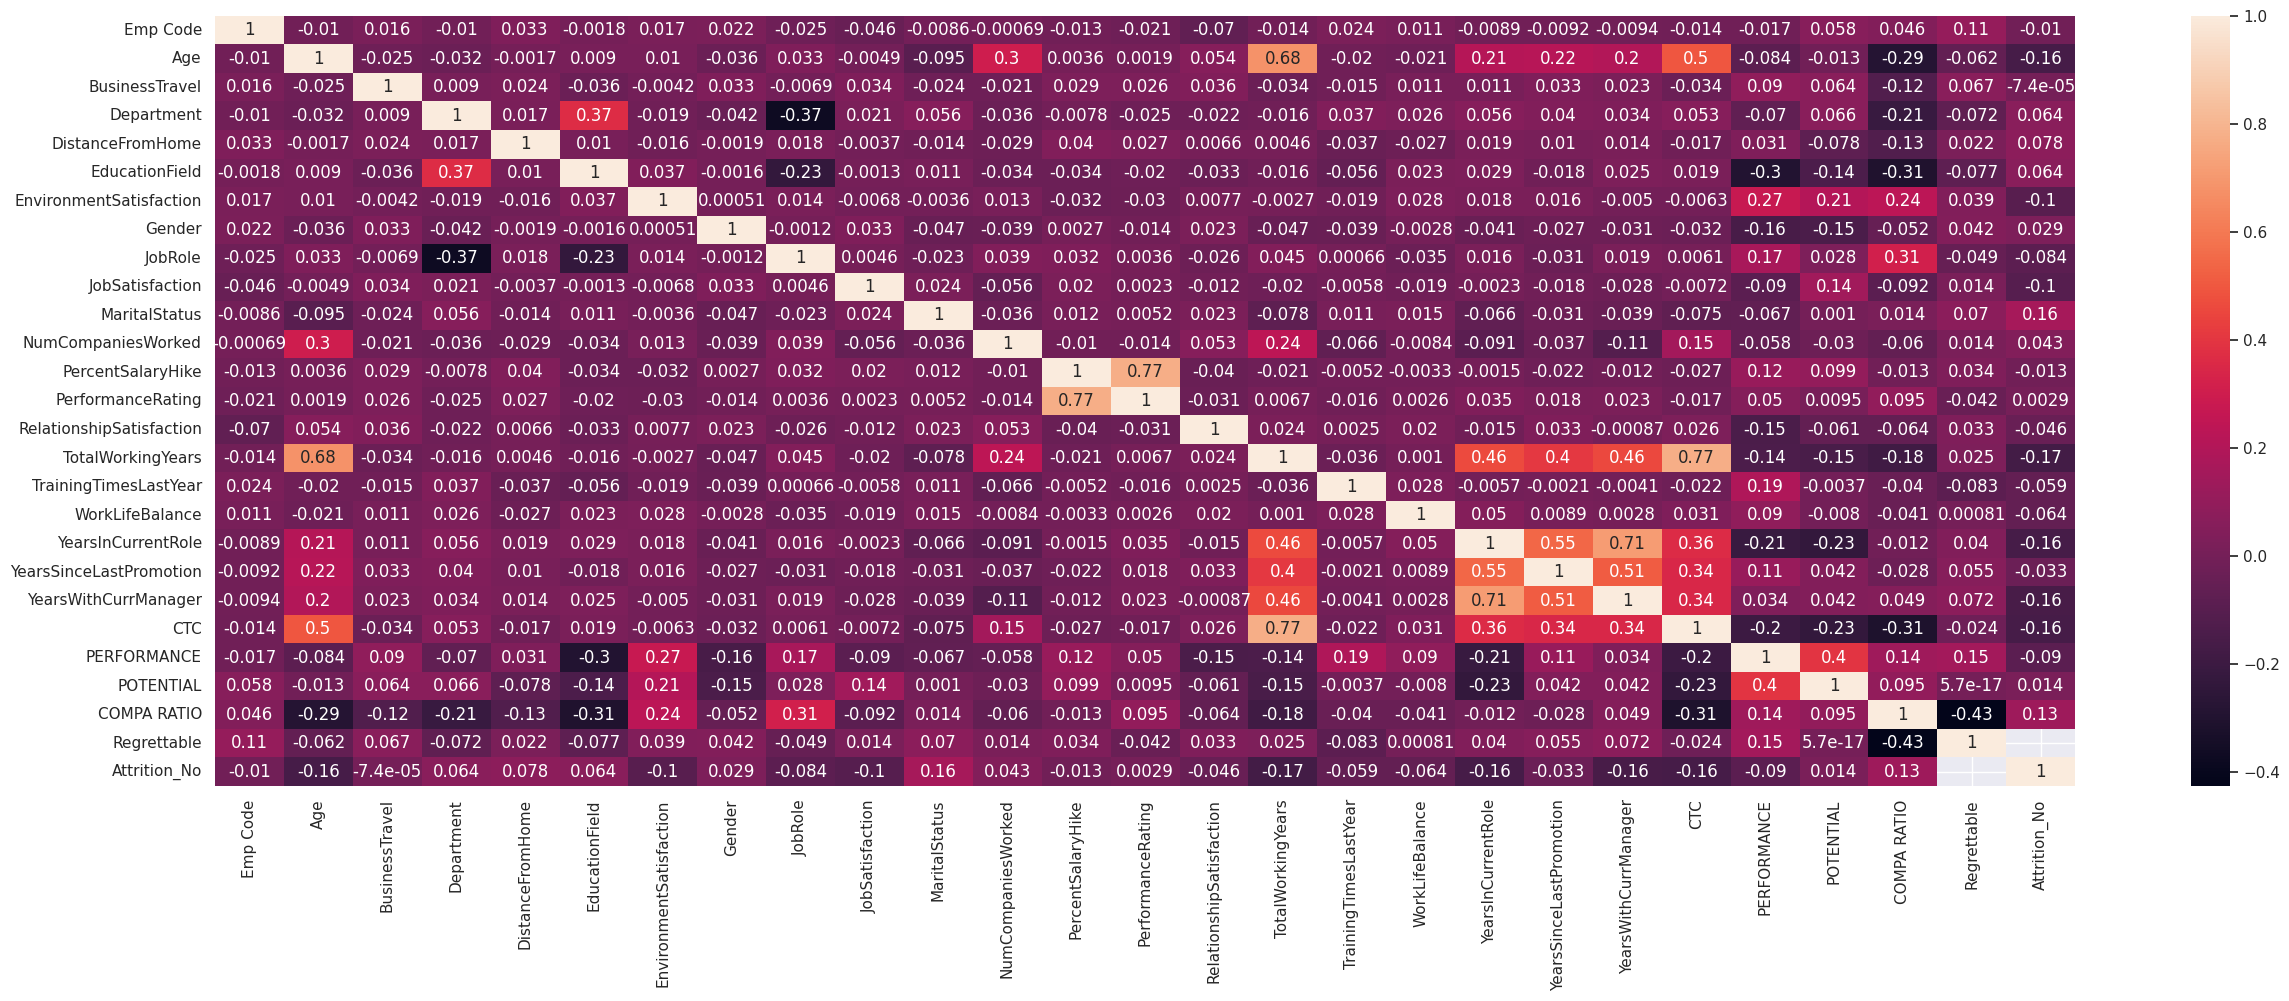

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(corr_var,annot=True)

In [ ]:
x=df_dept.iloc[:,:-1].values
y=df_dept['Attrition_No'].values #takes attrition number value 0 or 1

In [ ]:
df_dept.iloc[:,:-1].values

array([[8.000e+01, 4.600e+01, 1.000e+00, ...,       nan,       nan,
              nan],
       [1.010e+02, 3.700e+01, 1.000e+00, ...,       nan,       nan,
        1.000e+00],
       [1.060e+02, 5.900e+01, 3.000e+00, ...,       nan,       nan,
              nan],
       ...,
       [1.467e+03, 3.900e+01, 1.000e+00, ...,       nan,       nan,
              nan],
       [1.468e+03, 2.700e+01, 1.000e+00, ...,       nan,       nan,
              nan],
       [1.470e+03, 3.400e+01, 1.000e+00, ...,       nan,       nan,
              nan]])

In [ ]:
df_dept['Attrition_No'].values

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
x[0]

array([8.00000e+01, 4.60000e+01, 1.00000e+00, 1.00000e+00, 5.00000e+00,
       1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
       1.00000e+00, 8.00000e+00, 2.20000e+01, 4.00000e+00, 4.00000e+00,
       1.60000e+01, 2.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
       2.00000e+00, 1.25525e+05,         nan,         nan,         nan,
               nan])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
np.shape(x_train)

(1029, 26)

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

#using standard scalar to standardize columns like CTC, distance from home,etc

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [ ]:
x_train[np.isnan(x_train)]=0
x_test[np.isnan(x_test)]=0

In [ ]:
X_train[np.isnan(X_train)]=0
X_test[np.isnan(X_test)]=0

In [ ]:
X_train

array([[ 0.45262193,  0.88526837, -0.5862513 , ...,  0.        ,
         0.        ,  1.32137495],
       [ 0.64347096, -1.28441402, -0.5862513 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.86662197,  2.1870778 , -0.5862513 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82954876,  1.31920484, -0.5862513 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.56799215, -0.09108871,  0.91437702, ...,  0.        ,
         0.        ,  0.        ],
       [-1.131425  ,  0.88526837,  0.91437702, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
y_train[100]

0

  Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
attrition_prediction=lr.predict(x_test)

In [ ]:
attrition_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Checking accuracy of Logistic Regression Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
cm_lr=confusion_matrix(y_test,attrition_prediction)

In [ ]:
cm_lr

array([[377,   0],
       [ 64,   0]])

In [ ]:
accuracy_lr=accuracy_score(y_test,attrition_prediction)

In [ ]:
print("The accuracy of LR model is ",accuracy_lr*100,"%")

The accuracy of LR model is  85.4875283446712 %


In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,attrition_prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       377
           1       0.00      0.00      0.00        64

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.85      0.79       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Implementing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
attrition_prediction_rfc=rfc.predict(x_test)

In [ ]:
attrition_prediction_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Checking accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rfc=confusion_matrix(y_test,attrition_prediction_rfc)

In [ ]:
cm_rfc

array([[375,   2],
       [ 36,  28]])

In [ ]:
print(metrics.classification_report(y_test,attrition_prediction_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       377
           1       0.93      0.44      0.60        64

    accuracy                           0.91       441
   macro avg       0.92      0.72      0.77       441
weighted avg       0.92      0.91      0.90       441



In [ ]:
accuracy_rfc=accuracy_score(y_test,attrition_prediction_rfc)
print("The accuracy of Random Forest Classifier model is ",accuracy_rfc*100,"%")

The accuracy of Random Forest Classifier model is  91.38321995464852 %


Correlation among features

# **Using SMOTHE for balancing dataset and then predicting !**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=2)
x_train_smote,y_train_smote=smt.fit_resample(x_train,y_train.ravel())

In [ ]:
sum(y_train==1)

173

173

In [ ]:
sum(y_train==0)

856

856

In [ ]:
sum(y_train_smote==1)

856

856

In [ ]:
sum(y_train_smote==0)

856

856

Now, we have equal amount of data

In [ ]:
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)

LogisticRegression()

LogisticRegression()

In [ ]:
smote_prediction=lr.predict(x_test)

In [ ]:
accuracy_smote_lr=accuracy_score(y_test,smote_prediction)

In [ ]:
print("The accuracy score using SMOTE data balancing and LR model",accuracy_smote_lr*100,"%")

The accuracy score using SMOTE data balancing and LR model 58.95691609977324 %
The accuracy score using SMOTE data balancing and LR model 58.95691609977324 %


In [ ]:
print(metrics.classification_report(y_test,smote_prediction))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70       377
           1       0.22      0.72      0.34        64

    accuracy                           0.59       441
   macro avg       0.57      0.64      0.52       441
weighted avg       0.82      0.59      0.65       441

              precision    recall  f1-score   support

           0       0.92      0.57      0.70       377
           1       0.22      0.72      0.34        64

    accuracy                           0.59       441
   macro avg       0.57      0.64      0.52       441
weighted avg       0.82      0.59      0.65       441



f-1 score now also increases for attrition prediction (1) , which was 0 before SMOTE

In [ ]:
from sklearn.metrics import confusion_matrix
cm_smote_lr=confusion_matrix(y_test,smote_prediction)

In [ ]:
cm_smote_lr

array([[214, 163],
       [ 18,  46]])

array([[214, 163],
       [ 18,  46]])

This confusion matrix shows that 214 were TP, 46 TN, 163 large number of samples FP

# **USING GRADIO FOR UI OF MODEL**

In [ ]:
!pip install gradio

In [ ]:
!pip install typing_extensions --upgrade

In [ ]:
!pip install streamlit

In [ ]:
import pickle
pickle.dump(lr,open('lr_model_attrition.pkl','wb'))

In [ ]:
import streamlit as st
import pickle

In [ ]:
model=pickle.load(open('/content/lr_model_attrition.pkl','rb'))

In [ ]:
df_dept.columns

Index(['Emp Code', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CTC', 'PERFORMANCE', 'POTENTIAL', 'COMPA RATIO', 'Regrettable',
       'Attrition_No'],
      dtype='object')

Index(['Emp Code', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CTC', 'PERFORMANCE', 'POTENTIAL', 'COMPA RATIO', 'Regrettable',
       'Attrition_No'],
      dtype='object')

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
model=pickle.load(open('/content/lr_model_attrition.pkl','rb'))
st.set_page_config(
  page_title="EMPLOYEE ATTRITION PREDICTION!",
  page_icon="🧑‍💼"

)
st.title("EMPLOYEE ATTRITION PREDICTION!")
def main():
  st.markdown("<h1 style='text-align: center; color: White;background-color:#e84343'>Employee Attrition Predictor</h1>", unsafe_allow_html=True)
  st.markdown("<h3 style='text-align: center; color: Black;'>Drop in The required Inputs and we will do the rest.</h3>", unsafe_allow_html=True)
  st.sidebar.header("This Predictor calculates the employee Attrition based on the details of employees ")

Age= st.slider("AGE",0,100)
BusinessTravel = st.radio("Business Travel frequency: 1-- Travel Rarely , 2-- Travel Frequently ,3-- Non- Travel ",(1,2,3))
Department=st.radio("Department 1--'Human Resources' 2--'Research & Development'3--'Sales'",(1,2,3))
DistanceFromHome=st.slider("DistanceFromHome",0.0,50.0)
EducationField=st.radio(" Education Field 1--'Medical',2--'Human Resources',3--'Life Sciences',4--'Technical Degree',5--'Other',6--'Marketing'",(1,2,3,4,5,6))
EnvironmentSatisfaction=st.radio("Environment Satisfcation",(1,2,3,4))
Gender=st.radio("Gender of employee 1--Male 2--Female",(1,0))
JobRole=st.radio("Job Role",(1,2,3,4,5,6,7,8,9))
JobSatisfaction=st.radio("Job Satisfaction",(1,2,3,4,5))
MaritalStatus=st.radio("Marital Status of employee 1--Single 2--Married 3--Divorced",(1,2,3))
NumCompaniesWorked=st.slider("Number of companies worked before",0,40)
PercentSalaryHike=st.slider("Percent Salary hike",0,40)
PerformanceRating=st.radio("PerformanceRating",(3,4))
RelationshipSatisfaction=st.radio("Relationship Satisfaction",(1,2,3,4,5))
TotalWorkingYears=st.slider("Total working years",0,40)
TrainingTimesLastYear=st.slider("Training times last year",0,40)
WorkLifeBalance=st.radio("Work Life Balance of employee",(1,2,3,4,5))
YearsInCurrentRole=st.slider("Years in current role",0,40)
YearsSinceLastPromotion=st.slider("Years since Last promotion",0,40)
YearsWithCurrManager=st.slider("Years with current manager?",0,40)
CTC=st.slider("CTC of employee",0,10000000)
Performance=st.radio("Performance of employee",(2,3,4,5))
Potential=st.radio("Potential of employee rate",(2,3,4,5))
COMPA=st.slider("Compa Ratio of employee",80,120)
Regrettable=st.radio("Attrition Regretable?",(1,0))
attrition=st.radio("Attrition Yes or No?",(1,0))
inputs = [[ Age, BusinessTravel, Department, DistanceFromHome,
       EducationField, EnvironmentSatisfaction, Gender, JobRole,
       JobSatisfaction, MaritalStatus, NumCompaniesWorked,
       PercentSalaryHike, PerformanceRating, RelationshipSatisfaction,
       TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
       YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager,
       CTC, Performance, Potential, COMPA, Regrettable,
       attrition]] #our inputs

if st.button('Predict'): #making and printing our prediction
    result = model.predict(inputs)
    updated_res = result.flatten().astype(float)
    if (updated_res==[0.]):
     st.success("The LogisticRegression model predicts that Employee will : LEAVE ")
    else:
     st.success("The LogisticRegression model predicts that Employee will : STAY ")


if __name__ =='__main__':
  main() #calling the main method

Overwriting app.py
Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
!ngrok authtoken 2ZJryUwqeA0s90TEO5DYQJKeIBL_3HcvacvsFCwxbWkPWGoBc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


In [ ]:
url=ngrok.connect(8501)
url

<NgrokTunnel: "https://155e-34-106-57-171.ngrok-free.app" -> "http://localhost:8501">

<NgrokTunnel: "https://3d2a-34-106-57-171.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
!streamlit run --server.port 8051 app.py >/dev/null